<a href="https://githubtocolab.com/Astolfo2332/ProyectoAIcoffee/blob/main/01_Exploracion_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

En este caso para que no tengas que ingresar tus credenciales sube el token de tu sesión. si tienes dudas del como puedes consultar en:

In [ ]:
from google.colab import files

files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
'chmod 600 /root/.kaggle/kaggle.json' #Para proteger la información

In [1]:
!kaggle datasets download -d volpatto/coffee-quality-database-from-cqi
! unzip coffee-quality-database-from-cqi.zip

"kaggle" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing as ps
from difflib import SequenceMatcher

# Lectura de datos

In [5]:
df=pd.read_csv("arabica_data_cleaned.csv" ,index_col=False)
df=df.drop("Unnamed: 0",axis=1)
df

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.00,1700.00
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.00,2200.00,2000.00
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,Arabica,juan carlos garcia lopez,Mexico,el centenario,NaN,"la esperanza, municipio juchique de ferrer, ve...",1104328663,terra mia,900,juchique de ferrer,...,None,20,"September 17th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,900.00,900.00,900.00
1307,Arabica,myriam kaplan-pasternak,Haiti,200 farms,NaN,coeb koperativ ekselsyo basen (350 members),NaN,haiti coffee,~350m,"department d'artibonite , haiti",...,Blue-Green,16,"May 24th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,350.00,350.00,350.00
1308,Arabica,"exportadora atlantic, s.a.",Nicaragua,finca las marías,017-053-0211/ 017-053-0212,beneficio atlantic condega,017-053-0211/ 017-053-0212,exportadora atlantic s.a,1100,jalapa,...,Green,5,"June 6th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1100.00,1100.00,1100.00
1309,Arabica,juan luis alvarado romero,Guatemala,finca el limon,NaN,beneficio serben,11/853/165,unicafe,4650,nuevo oriente,...,Green,4,"May 24th, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1417.32,1417.32,1417.32


Mezclar los datos para hacer un set de training y uno de test

Eliminamos las columnas que no son de nuestro interes

In [6]:
div=len(df)//4
df2=df.copy()
names=df2.columns.values
a=[0,1,3,4,5,6,7,8,10,11,12,13,15,16,35,36,37,38,39]
names=names[a]
df2=df2.drop(names,axis=1)
df2

,Country.of.Origin,Region,Harvest.Year,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,...,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Ethiopia,guji-hambela,2014,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,...,8.75,90.58,0.12,0,0.0,Green,0,1950.00,2200.00,2075.00
1,Ethiopia,guji-hambela,2014,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,...,8.58,89.92,0.12,0,0.0,Green,1,1950.00,2200.00,2075.00
2,Guatemala,NaN,NaN,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,...,9.25,89.75,0.00,0,0.0,NaN,0,1600.00,1800.00,1700.00
3,Ethiopia,oromia,2014,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,...,8.67,89.00,0.11,0,0.0,Green,2,1800.00,2200.00,2000.00
4,Ethiopia,guji-hambela,2014,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,...,8.58,88.83,0.12,0,0.0,Green,2,1950.00,2200.00,2075.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,Mexico,juchique de ferrer,2012,Bourbon,Washed / Wet,7.08,6.83,6.25,7.42,7.25,...,6.75,68.33,0.11,0,0.0,None,20,900.00,900.00,900.00
1307,Haiti,"department d'artibonite , haiti",2012,Typica,Natural / Dry,6.75,6.58,6.42,6.67,7.08,...,6.42,67.92,0.14,8,0.0,Blue-Green,16,350.00,350.00,350.00
1308,Nicaragua,jalapa,2016,Caturra,Other,7.25,6.58,6.33,6.25,6.42,...,6.17,63.08,0.13,1,0.0,Green,5,1100.00,1100.00,1100.00
1309,Guatemala,nuevo oriente,2012,Catuai,Washed / Wet,7.50,6.67,6.67,7.67,7.33,...,6.67,59.83,0.10,0,0.0,Green,4,1417.32,1417.32,1417.32


## Análisis de la variable

En este caso nos centramos en Total.Cup.Points

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          5.,   6.,  20.,  56., 311., 752., 142.,  16.]),
 array([ 0.        ,  3.01933333,  6.03866667,  9.058     , 12.07733333,
        15.09666667, 18.116     , 21.13533333, 24.15466667, 27.174     ,
        30.19333333, 33.21266667, 36.232     , 39.25133333, 42.27066667,
        45.29      , 48.30933333, 51.32866667, 54.348     , 57.36733333,
        60.38666667, 63.406     , 66.42533333, 69.44466667, 72.464     ,
        75.48333333, 78.50266667, 81.522     , 84.54133333, 87.56066667,
        90.58      ]),
 <BarContainer object of 30 artists>)

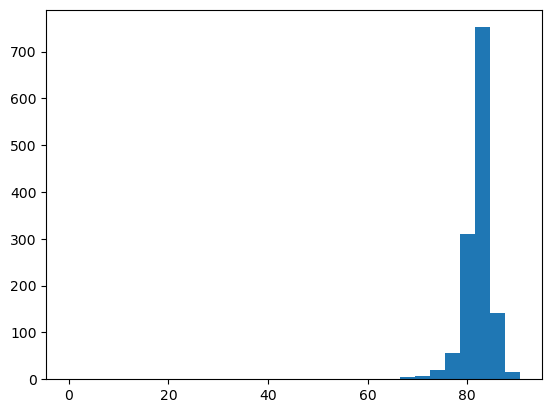

In [7]:
plt.hist(df2["Total.Cup.Points"],bins=30)

In [8]:
print('Skewness de la variable ', df2["Total.Cup.Points"].skew())

Skewness de la variable  -10.529617355125911


Se nota la curva hacia la derecha así que se procede a realizar una transformación para normalizarla

Se elimina un valor con 0 para continuar con el análisis

In [9]:
i=df2[df2["Total.Cup.Points"]==0].index

In [10]:
df2=df2.drop(i)

(array([  3.,  13.,  27.,  77., 255., 402., 253., 135.,  59.,  29.,  14.,
         13.,   9.,   5.,   4.,   1.,   4.,   1.,   2.,   2.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([0.01103996, 0.0112291 , 0.01141824, 0.01160737, 0.01179651,
        0.01198564, 0.01217478, 0.01236391, 0.01255305, 0.01274218,
        0.01293132, 0.01312045, 0.01330959, 0.01349872, 0.01368786,
        0.01387699, 0.01406613, 0.01425526, 0.0144444 , 0.01463353,
        0.01482267, 0.01501181, 0.01520094, 0.01539008, 0.01557921,
        0.01576835, 0.01595748, 0.01614662, 0.01633575, 0.01652489,
        0.01671402]),
 <BarContainer object of 30 artists>)

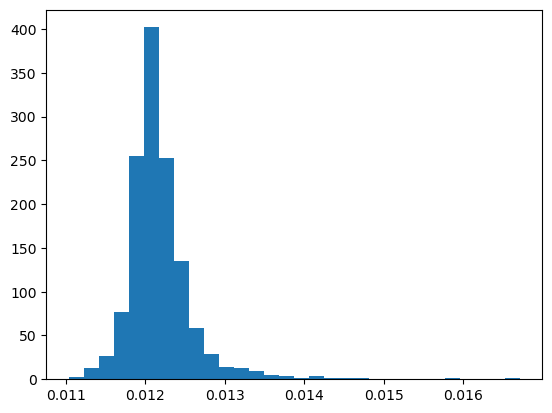

In [11]:
plt.hist((1/df2["Total.Cup.Points"]),bins=30)

In [12]:
print('Skewness de la variable transformada', 1/df2["Total.Cup.Points"].skew())

Skewness de la variable transformada -0.5436900099673384


Aunque notemos que esta variable depende de flavor, aroma etc. así que a estos valores también se podrían transformar para mantener dicha dependencia

In [13]:
names=df2.columns.values
df2[names[5:16]]=1/df2[names[5:16]]
df2

,Country.of.Origin,Region,Harvest.Year,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,...,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Ethiopia,guji-hambela,2014,NaN,Washed / Wet,0.115340,0.113250,0.115340,0.114286,0.117647,...,0.114286,0.011040,0.12,0,0.0,Green,0,1950.00,2200.00,2075.00
1,Ethiopia,guji-hambela,2014,Other,Washed / Wet,0.114286,0.115340,0.117647,0.116550,0.118765,...,0.116550,0.011121,0.12,0,0.0,Green,1,1950.00,2200.00,2075.00
2,Guatemala,NaN,NaN,Bourbon,NaN,0.118765,0.117647,0.118765,0.118765,0.120048,...,0.108108,0.011142,0.00,0,0.0,NaN,0,1600.00,1800.00,1700.00
3,Ethiopia,oromia,2014,NaN,Natural / Dry,0.122399,0.116550,0.118765,0.118765,0.117647,...,0.115340,0.011236,0.11,0,0.0,Green,2,1800.00,2200.00,2000.00
4,Ethiopia,guji-hambela,2014,Other,Washed / Wet,0.121212,0.117647,0.121212,0.117647,0.118765,...,0.116550,0.011257,0.12,0,0.0,Green,2,1950.00,2200.00,2075.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,Honduras,marcala,2014,Catuai,Washed / Wet,0.142857,0.157978,0.162075,0.153846,0.149925,...,0.157978,0.014457,0.10,0,0.0,Green,4,1450.00,1450.00,1450.00
1306,Mexico,juchique de ferrer,2012,Bourbon,Washed / Wet,0.141243,0.146413,0.160000,0.134771,0.137931,...,0.148148,0.014635,0.11,0,0.0,None,20,900.00,900.00,900.00
1307,Haiti,"department d'artibonite , haiti",2012,Typica,Natural / Dry,0.148148,0.151976,0.155763,0.149925,0.141243,...,0.155763,0.014723,0.14,8,0.0,Blue-Green,16,350.00,350.00,350.00
1308,Nicaragua,jalapa,2016,Caturra,Other,0.137931,0.151976,0.157978,0.160000,0.155763,...,0.162075,0.015853,0.13,1,0.0,Green,5,1100.00,1100.00,1100.00


## Exploración de otras variables

Países de origen

Se filtra otros valores que aunque tenga datos, no proporciona mucha información

In [14]:
i=df2[df2["Country.of.Origin"].isna()].index

In [15]:
df2=df2.drop(i)

Text(0, 0.5, 'Pais de origen')

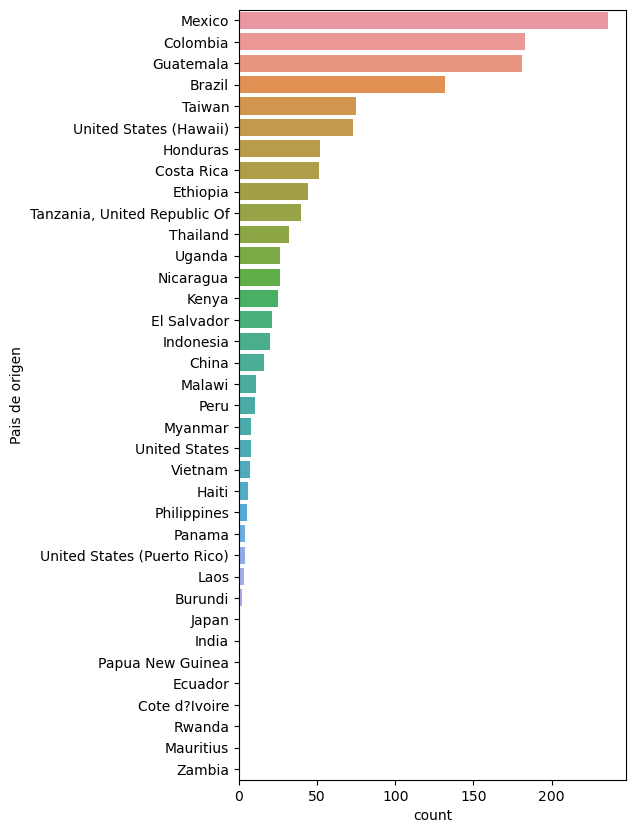

In [17]:

large_to_small = df2.groupby("Country.of.Origin").size().sort_values().index[::-1]
plt.figure(figsize=(5,10))
sns.countplot(y="Country.of.Origin",data=df2,order=large_to_small)
plt.ylabel("Pais de origen")


En el data set se encuentran principalmente datos de países latinoamericanos 

Mejor cup total entre países 

In [18]:
count_names=df2["Country.of.Origin"].unique().tolist()
a=df2.loc[0:,["Country.of.Origin","Total.Cup.Points"]]
b={}
for i in count_names:
    b[i]=np.mean(1/(a[a["Country.of.Origin"]==i]["Total.Cup.Points"]))
b=pd.DataFrame(list(b.items()),columns=["Country.of.Origin","Mean.Total.Cup.Points"])


(70.0, 100.0)

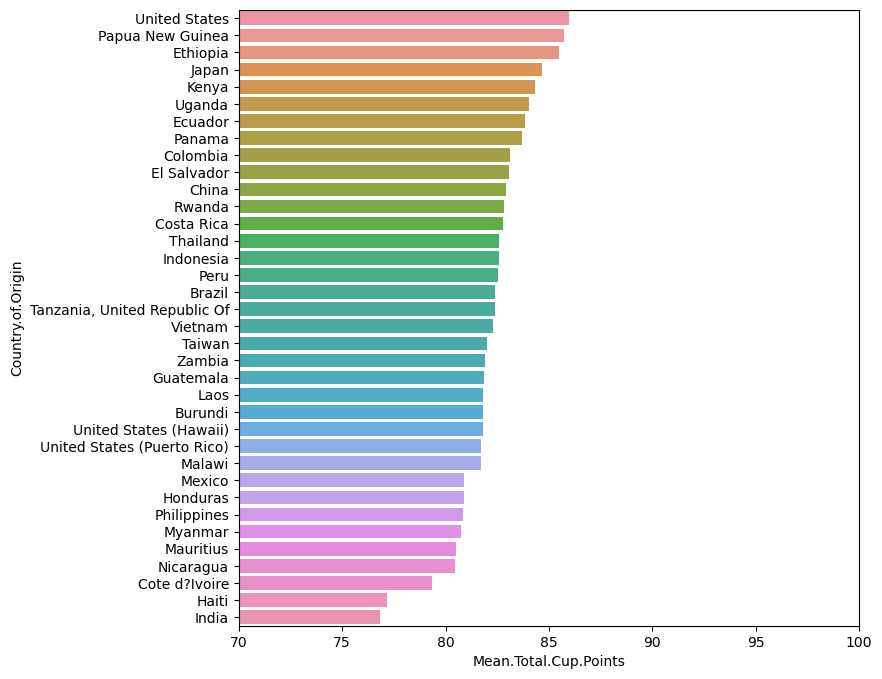

In [25]:
b=b.sort_values(by="Mean.Total.Cup.Points",ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(x="Mean.Total.Cup.Points",y="Country.of.Origin",data=b)
plt.xlim([70,100])


En este caso se puede observar que de los mejores resultados se encuentran países como estados unidos o Papua Nueva Guinea, sin embargo de estos también se encuentran menos registros en el data set, por otra parte se nota que las calificaciones en promedio son superiores a 75 puntos. 

## Datos faltanes

Aunque se hizo un pequeño filtrado gracias a la exploración siguen existiendo datos faltantes 

In [26]:
total           = df2.isnull().sum().sort_values(ascending=False)
percent         = (df2.isnull().sum()/df2.isnull().count()*100).sort_values(ascending=False)
missing_train  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_train

,Total,Percent
altitude_mean_meters,226,17.265088
altitude_high_meters,226,17.265088
altitude_low_meters,226,17.265088
Color,215,16.424752
Variety,200,15.278839
Processing.Method,150,11.459129
Region,56,4.278075
Harvest.Year,46,3.514133
Quakers,1,0.076394
Cupper.Points,0,0.000000


In [27]:
missing_train['altitude_mean_meters':'Quakers'].Percent

altitude_mean_meters    17.265088
altitude_high_meters    17.265088
altitude_low_meters     17.265088
Color                   16.424752
Variety                 15.278839
Processing.Method       11.459129
Region                   4.278075
Harvest.Year             3.514133
Quakers                  0.076394
Name: Percent, dtype: float64

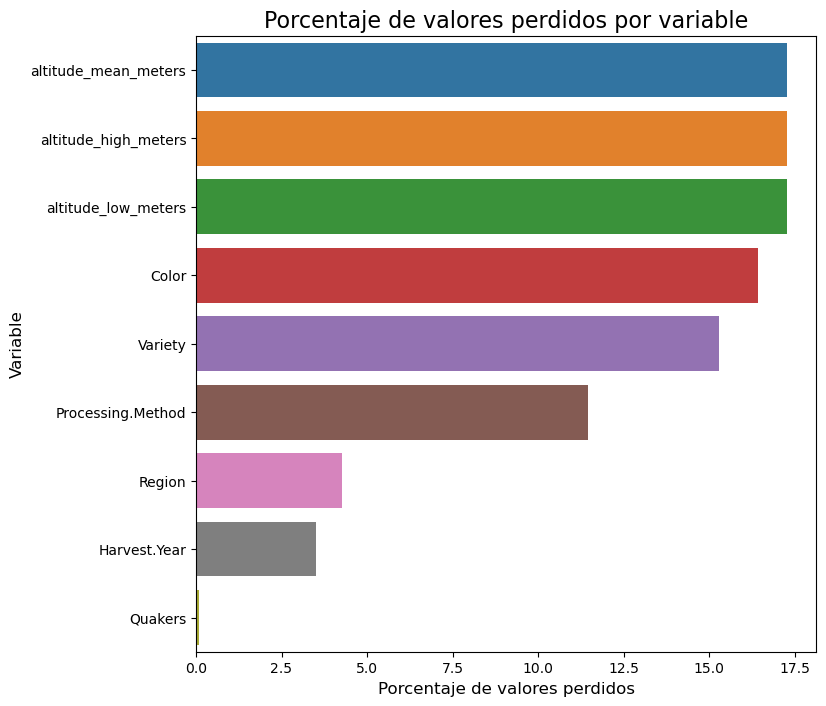

In [28]:
plt.figure(figsize=(8,8))
sns.barplot(x = missing_train['altitude_mean_meters':'Quakers'].Percent,
                    y = missing_train.index[0:9]).set_title("Porcentaje de valores perdidos por variable", fontsize=16)
plt.xlabel('Porcentaje de valores perdidos', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.show()

## Preprosesamiento

Primero como se pudo observar anteriormente los datos de los años están desorganizados y algunos no tienen una estructura de un año en particular así que se intenta organizar dependiendo de su similitud con una lista de años estándar

In [188]:
def year_compare(d):
    years=d["Harvest.Year"].unique().tolist()
    year=2018
    a=list(map(str,range(year,year-10,-1)))
    for i in years:
        g=(0,0)
        for j in a:
            c=SequenceMatcher(a=str(i),b=j).ratio()
            e,f=g
            if e<c:
                g=(c,j)
        e,f=g
        d.loc[d[d["Harvest.Year"]==i]["Harvest.Year"].index.values,["Harvest.Year"]]=f
    return d


In [189]:
df2=year_compare(df2)


Como se pudo ver anteriormente se hizo un ligero filtrado de datos inusuales, en este caso se procede a discretizar los valores de los países de origen. Lo mismo se intenta para las regiones.

Text(0, 0.5, 'Pais de origen')

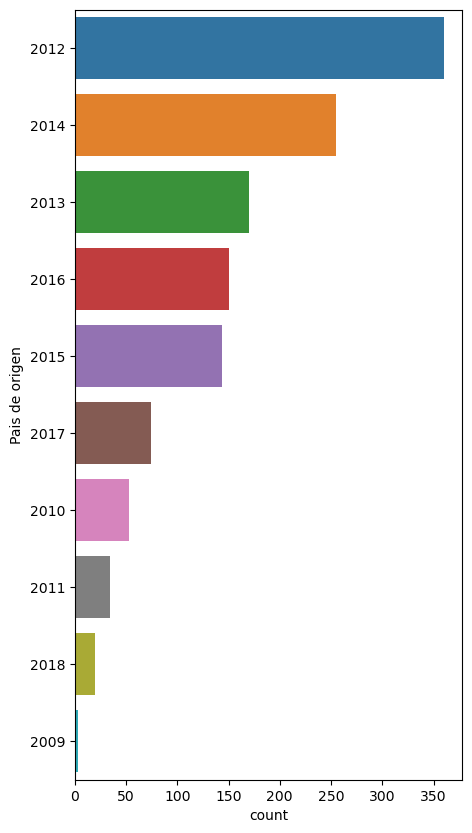

In [190]:
large_to_small = df2.groupby('Harvest.Year').size().sort_values().index[::-1]
plt.figure(figsize=(5,10))
sns.countplot(y="Harvest.Year",data=df2,order=large_to_small)
plt.ylabel("Pais de origen")

In [205]:
df2.to_csv("Post_paises.csv",index=False)

In [192]:
df2=pd.read_csv("Post_paises.csv")

## Arreglo de datos faltantes

En este caso se opta por arreglar los datos faltantes, ya que sabemos que la mayoría se encuentran en la altura o el color estos se reemplazaran con el promedio, pero con casos especiales, este promedio será dependiendo del país de origen, ya que no tendría sentido reemplazarlo en un caso de que un país tenga una altura mayor que la maxima real del país.

Primeramente se encontró un valor extremadamente inusual en nicaragua así que se arregla manualmente al ser único y afectar bastante el promedio del país

In [61]:
df2.loc[1040,["altitude_low_meters","altitude_high_meters","altitude_mean_meters"]]=1100

In [119]:
count_names=df2["Country.of.Origin"].unique().tolist()
a=df2.loc[0:,["Country.of.Origin","altitude_low_meters","altitude_high_meters"]]
b={}
prom_low=[]
prom_high=[]
prom_mean=[]
for i in count_names:
    low=np.mean(a[a["Country.of.Origin"]==i]["altitude_low_meters"])
    high=np.mean(a[a["Country.of.Origin"]==i]["altitude_high_meters"])
    prom_low.append(low)
    prom_high.append(high)
    prom_mean.append(np.mean([low,high]))
b["Country.of.Origin"]=count_names
b["altitude_low_meters"]=prom_low
b["altitude_high_meters"]=prom_high
b["altitude_mean_meters"]=prom_mean
b=pd.DataFrame(b)
to_fill=df2[df2["altitude_low_meters"].isna()].index.values
for i in to_fill:
    c=df2.loc[i,["Country.of.Origin"]]
    indx=b[b["Country.of.Origin"]==c["Country.of.Origin"]].index.values
    new=b.loc[indx,["altitude_low_meters","altitude_high_meters","altitude_mean_meters"]]
    df2.loc[i,["altitude_low_meters","altitude_high_meters","altitude_mean_meters"]]=new.values[0]


Ahora para las regiones, variedadm método de procesado y color tomamos la moda por país y la reemplazamos, debido a la posible diferencia de café dependiendo del propio país seria mejor hacerlo por cada región, pero debido a la falta de datos para algunas no es posible. Para los paises que esto no sea posible por falta de datos del propio país se reemplaza con la moda del data set en su campo particular

In [145]:
def fill_values(df,column,b):
    to_fill=df[df[column].isna()].index.values
    for i in to_fill:
        c=df.loc[i,["Country.of.Origin"]]
        indx=b[b["Country.of.Origin"]==c["Country.of.Origin"]].index.values
        new=b.loc[indx,[column]]
        df.loc[i,[column]]=new.values[0]
    return df


In [167]:
def makeb(df,column):
    count_names=df["Country.of.Origin"].unique().tolist()
    a=df.loc[0:,["Country.of.Origin","Region","Variety","Processing.Method"]]
    b={}
    r=[]
    for i in count_names:
        try:
            r.append(a[a["Country.of.Origin"]==i][column].mode()[0])
        except KeyError:
            r.append(a[column].mode()[0])
    b["Country.of.Origin"]=count_names
    b[column]=r
    return pd.DataFrame(b)

In [176]:
b=makeb(df2,"Region")
df2=fill_values(df2,"Region",b)
b=makeb(df2,"Variety")
df2=fill_values(df2,"Variety",b)
b=makeb(df2,"Processing.Method")
df2=fill_values(df2,"Processing.Method",b)
#b=makeb(df2,"Color")
#df2=fill_values(df2,"Color",b)


Seguimos con el año de cosecha en este caso tomamos un promedio de los años presentes y lo aproximamos a su entero más cercano

In [203]:
a=np.mean(df2["Harvest.Year"])//1
df2["Harvest.Year"].fillna(a,inplace=True)

In [204]:
df2.isna().sum()

Country.of.Origin         0
Region                    0
Harvest.Year              0
Variety                   0
Processing.Method         0
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean.Cup                 0
Sweetness                 0
Cupper.Points             0
Total.Cup.Points          0
Moisture                  0
Category.One.Defects      0
Quakers                   1
Color                   215
Category.Two.Defects      0
altitude_low_meters       1
altitude_high_meters      1
altitude_mean_meters      1
dtype: int64

Así gracias a la transformación de las variables, tenemos una gran dependencia de las categorías a evaluar para una calificación final de la copa, primeramente observando al sabor, regusto y balance, y en menor medida su altitud o la presencia de defectos.

In [34]:
cat=["Country.of.Origin","Region","Variety","Processing.Method","Color"]
encoder=ps.LabelEncoder()
for i in cat:
    df2[i]=encoder.fit_transform(df2[i])

print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1309
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country.of.Origin     1309 non-null   int32  
 1   Region                1309 non-null   int32  
 2   Harvest.Year          1263 non-null   object 
 3   Variety               1309 non-null   int32  
 4   Processing.Method     1309 non-null   int32  
 5   Aroma                 1309 non-null   float64
 6   Flavor                1309 non-null   float64
 7   Aftertaste            1309 non-null   float64
 8   Acidity               1309 non-null   float64
 9   Body                  1309 non-null   float64
 10  Balance               1309 non-null   float64
 11  Uniformity            1309 non-null   float64
 12  Clean.Cup             1309 non-null   float64
 13  Sweetness             1309 non-null   float64
 14  Cupper.Points         1309 non-null   float64
 15  Total.Cup.Points     

## Correlación entre variables

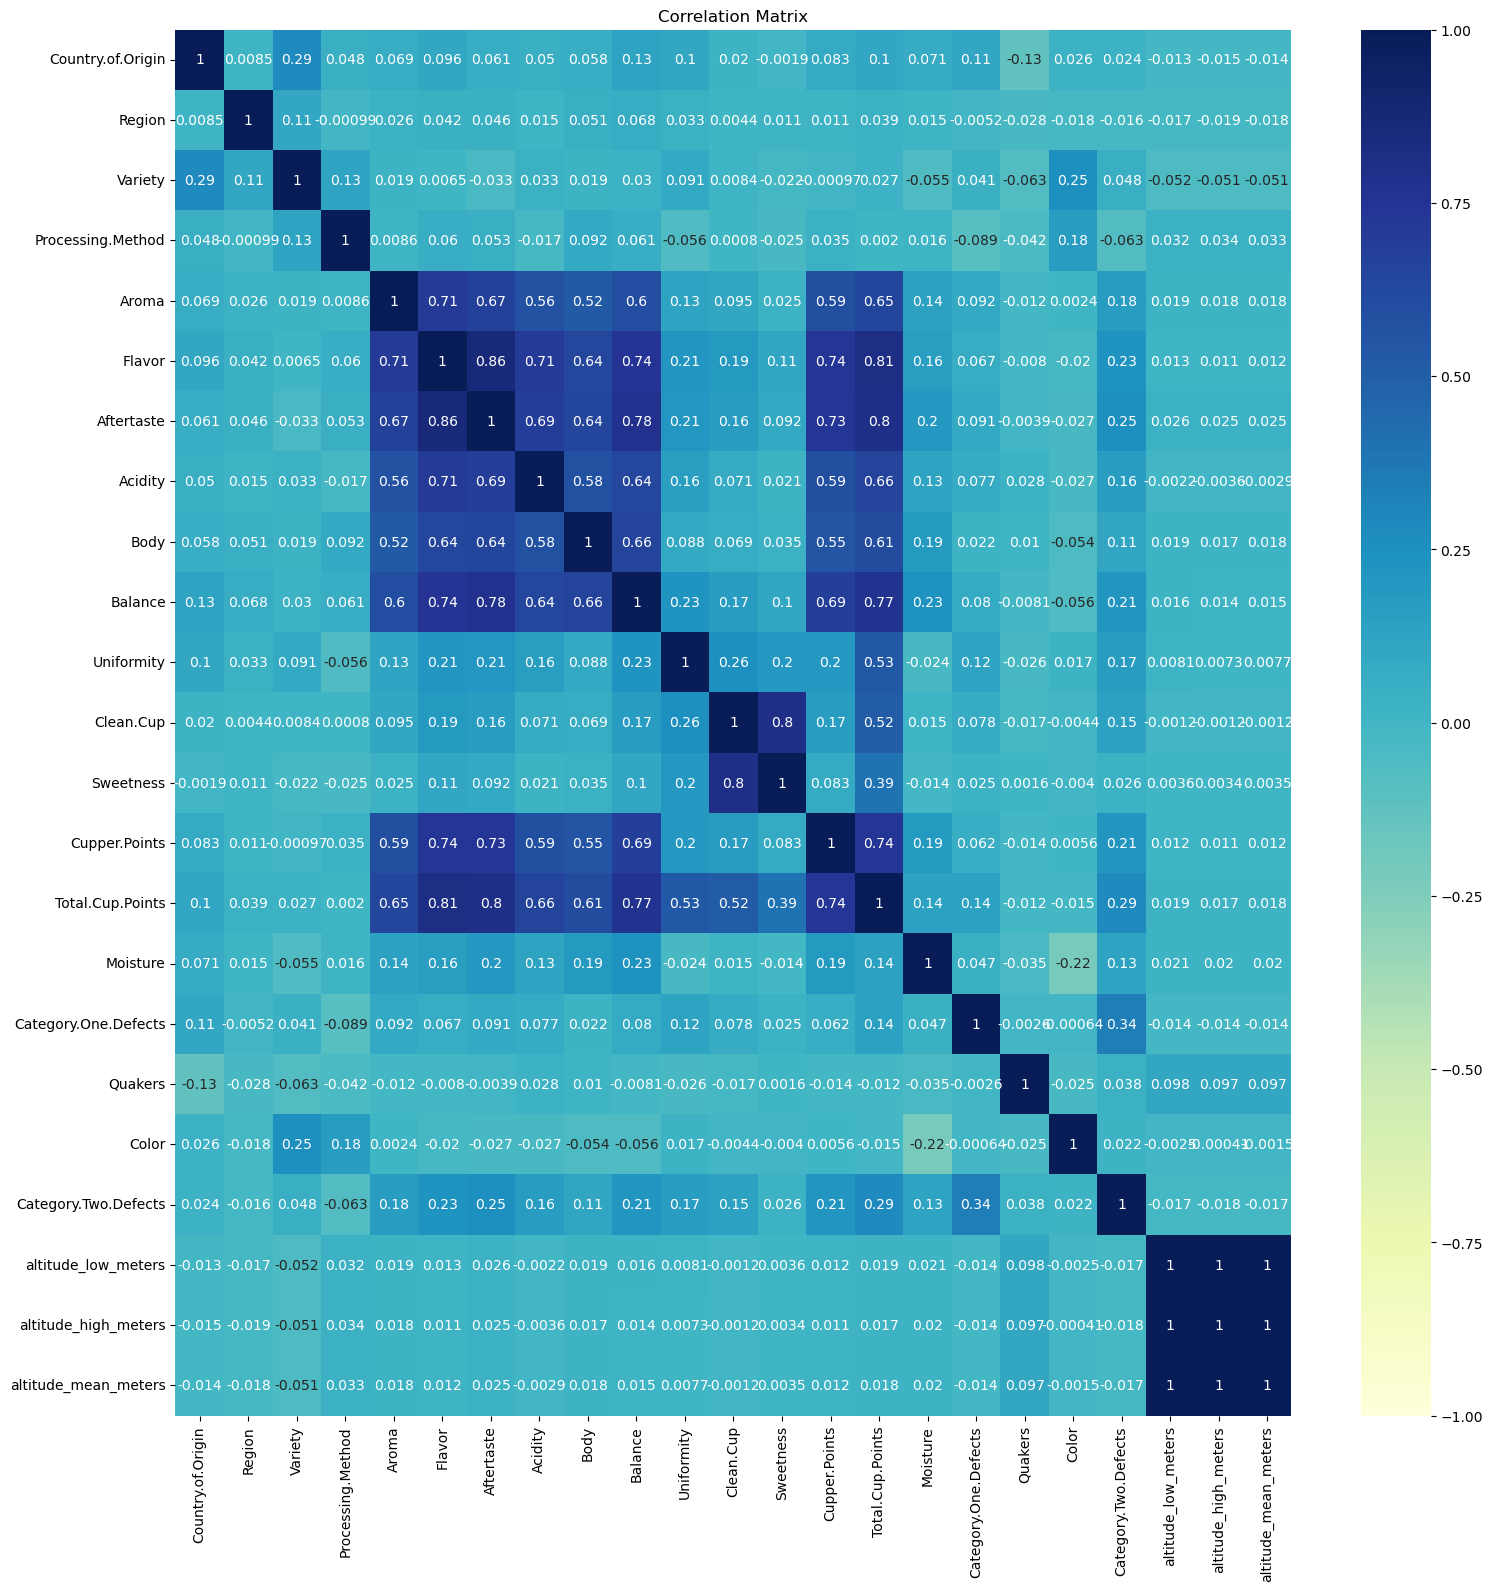

In [35]:
#Matriz de correlaciones
corr_matrix = df2.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "YlGnBu").set_title('Correlation Matrix')
plt.show()

In [36]:
#Correlaciones de las variables con la variable objetivo
target_corr_df = pd.DataFrame(corr_matrix["Total.Cup.Points"].sort_values(ascending=False))
target_corr_df 

,Total.Cup.Points
Total.Cup.Points,1.000000
Flavor,0.807671
Aftertaste,0.798963
Balance,0.769274
Cupper.Points,0.738914
Acidity,0.660325
Aroma,0.645642
Body,0.608980
Uniformity,0.525293
Clean.Cup,0.515240


In [7]:
df2=df2.sample(frac=1) #Desorganizamos las filas

In [8]:
df2=df2.reset_index(drop=True)
train=df2[div:]
test=df2[:div]

In [9]:
test

,Country.of.Origin,Region,Harvest.Year,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,...,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Costa Rica,central valley,2013,Catuai,Washed / Wet,0.130378,0.131926,0.133333,0.131926,0.133333,...,0.130378,0.012048,0.11,0,0.0,Green,3,1100.0,1300.0,1200.0
1,Brazil,south of minas,2011,NaN,NaN,0.131926,0.129032,0.130378,0.133333,0.130378,...,0.134771,0.012024,0.02,0,0.0,NaN,2,900.0,900.0,900.0
2,Brazil,campos altos - cerrado,2016,NaN,NaN,0.137931,0.151976,0.151976,0.142857,0.142857,...,0.149925,0.013605,0.11,0,1.0,Green,0,NaN,NaN,NaN
3,"Tanzania, United Republic Of",mbeya,2014,Other,Washed / Wet,0.136426,0.136426,0.136426,0.134771,0.133333,...,0.134771,0.012207,0.12,0,0.0,Green,4,1877.0,1877.0,1877.0
4,Brazil,south of minas,2011,NaN,NaN,0.125000,0.125000,0.133333,0.133333,0.130378,...,0.126263,0.011858,0.02,0,0.0,NaN,2,900.0,1200.0,1050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,Mexico,"sierra norte yajalon, chiapas",2014,Typica,Washed / Wet,0.144509,0.142857,0.146413,0.144509,0.134771,...,0.148148,0.014134,0.12,0,0.0,Green,1,1000.0,1000.0,1000.0
323,"Tanzania, United Republic Of",ngorogoro,2014,Other,Washed / Wet,0.134771,0.134771,0.134771,0.134771,0.136426,...,0.134771,0.012232,0.12,0,0.0,Bluish-Green,4,1500.0,1700.0,1600.0
324,Thailand,NaN,2011,NaN,NaN,0.131926,0.129032,0.131926,0.129032,0.131926,...,0.125000,0.011905,0.06,0,0.0,NaN,0,NaN,NaN,NaN
325,Mexico,veracruz,2014,NaN,Washed / Wet,0.136426,0.131926,0.134771,0.133333,0.133333,...,0.133333,0.012146,0.11,0,0.0,Green,0,NaN,NaN,NaN


In [10]:
train

,Country.of.Origin,Region,Harvest.Year,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,...,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
327,Mexico,NaN,2012,Other,Washed / Wet,0.131926,0.131926,0.134771,0.131926,0.134771,...,0.131926,0.012096,0.11,0,0.0,NaN,2,1100.0,1100.0,1100.0
328,Taiwan,changhua baguashan 彰化市八卦山,2016 / 2017,NaN,NaN,0.137931,0.137931,0.142857,0.141243,0.142857,...,0.100000,0.012109,0.11,0,0.0,Blue-Green,0,200.0,200.0,200.0
329,Mexico,el remudadero,2012,Typica,Washed / Wet,0.127714,0.131926,0.130378,0.126263,0.126263,...,0.126263,0.011811,0.13,0,0.0,NaN,3,1200.0,1200.0,1200.0
330,United States (Hawaii),kona,2012,Hawaiian Kona,Washed / Wet,0.133333,0.133333,0.133333,0.134771,0.130378,...,0.133333,0.012060,0.10,0,0.0,Green,0,NaN,NaN,NaN
331,United States (Hawaii),kona,2012,Hawaiian Kona,Washed / Wet,0.139470,0.133333,0.144509,0.136426,0.130378,...,0.141243,0.012449,0.12,5,0.0,Green,7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,Mexico,veracruz,2012,Mundo Novo,Washed / Wet,0.139470,0.136426,0.141243,0.131926,0.136426,...,0.142857,0.012513,0.11,0,0.0,Green,0,1250.0,1250.0,1250.0
1306,Colombia,huila,2015,Caturra,Washed / Wet,0.125000,0.133333,0.133333,0.130378,0.125000,...,0.130378,0.011881,0.00,0,0.0,Bluish-Green,0,1600.0,1950.0,1775.0
1307,Mexico,xalapa,2012,Caturra,Washed / Wet,0.129032,0.136426,0.137931,0.131926,0.131926,...,0.131926,0.012133,0.13,0,0.0,Green,1,1170.0,1170.0,1170.0
1308,Honduras,marcala,2015,Catuai,Washed / Wet,0.131926,0.134771,0.139470,0.134771,0.139470,...,0.134771,0.012296,0.09,0,0.0,Green,4,1350.0,1350.0,1350.0


In [16]:
test.to_csv("test.csv",index=False)
train.to_csv("train.csv", index=False)